In [ ]:
import tensorflow as tf #import required libraries
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data() #load the datasets
X_train.shape #Check the shape of x_train  training samples , 32/32 image 3-rgb colors

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

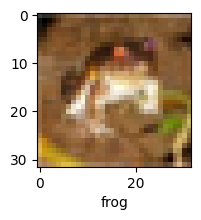

In [ ]:
plot_sample(X_train, y_train, 0)

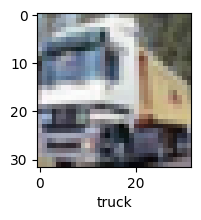

In [ ]:
plot_sample(X_train, y_train, 1)

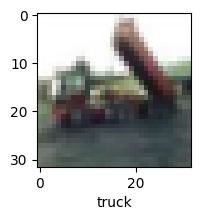

In [ ]:
plot_sample(X_train, y_train, 2)

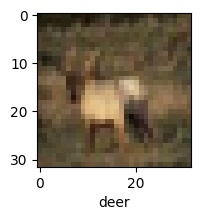

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train = X_train / 255.0 #pixel value range 0 to 255 Normalize
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),#3000 neurons
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    #10 classess
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', # ship directly a value  scc
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5) #accuracy 49%

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.3101 - loss: 1.9288
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.4177 - loss: 1.6476
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 95ms/step - accuracy: 0.4540 - loss: 1.5549
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 88ms/step - accuracy: 0.4705 - loss: 1.4932
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 89ms/step - accuracy: 0.4951 - loss: 1.4340


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.51      0.55      1000
           1       0.79      0.29      0.43      1000
           2       0.41      0.31      0.35      1000
           3       0.35      0.26      0.30      1000
           4       0.49      0.26      0.34      1000
           5       0.36      0.42      0.39      1000
           6       0.57      0.47      0.51      1000
           7       0.32      0.79      0.46      1000
           8       0.75      0.46      0.57      1000
           9       0.44      0.72      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.7925 - loss: 0.6000
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 41ms/step - accuracy: 0.8054 - loss: 0.5587
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.8151 - loss: 0.5370
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8219 - loss: 0.5083
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.8306 - loss: 0.4867
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.8404 - loss: 0.4571
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8501 - loss: 0.4321
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8550 - loss: 0.4176
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8616 - loss: 0.3923
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.8732 - loss: 0.3651


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7074 - loss: 1.0800


[1.1058685779571533, 0.7024000287055969]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([[2.19893139e-02, 1.01289302e-07, 1.30595407e-04, 5.64746559e-01,
        2.53879395e-03, 4.09122884e-01, 8.71082011e-05, 2.84170692e-05,
        1.34357729e-03, 1.26093246e-05],
       [2.02466890e-06, 1.08504370e-02, 9.67059250e-08, 9.49612584e-08,
        1.92050251e-08, 1.52005908e-09, 5.44953978e-11, 8.98502162e-09,
        9.89144683e-01, 2.64823439e-06],
       [9.63981450e-03, 3.35965097e-01, 2.67273062e-05, 4.46353899e-03,
        3.78980022e-03, 2.15848791e-04, 1.18742886e-04, 8.14478670e-04,
        6.25121534e-01, 1.98443756e-02],
       [9.90219831e-01, 5.03122521e-08, 9.36787482e-03, 5.66587516e-07,
        6.51997179e-05, 2.90416381e-07, 2.74970284e-06, 4.52398526e-05,
        2.98012950e-04, 2.09940893e-07],
       [2.77424199e-08, 2.88169204e-08, 2.27210987e-02, 6.21389551e-03,
        4.42631334e-01, 4.32296702e-06, 5.28429270e-01, 1.95878047e-09,
        1.65872862e-08, 3.39927003e-10]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

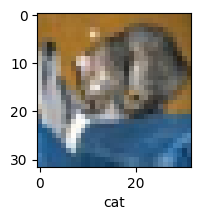

In [ ]:
plot_sample(X_test, y_test,0)

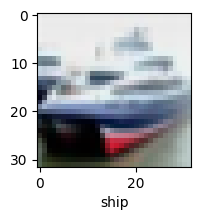

In [ ]:
plot_sample(X_test, y_test,1)

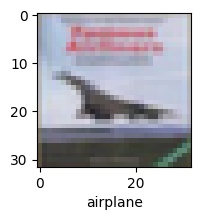

In [ ]:
plot_sample(X_test, y_test,3)

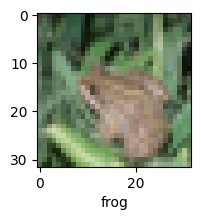

In [ ]:
plot_sample(X_test, y_test,4)

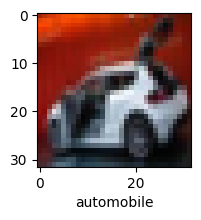

In [ ]:
plot_sample(X_test, y_test,6)

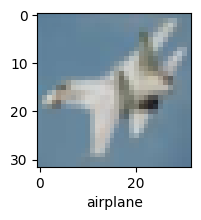

In [ ]:
plot_sample(X_test, y_test,10)

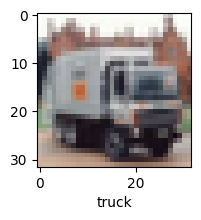

In [ ]:
plot_sample(X_test, y_test,11)